In [1]:
import os
import sys
import math
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize_scalar
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import audio_features as af

In [2]:
SAVE_FILE = True
DIR_NAME = "clustering_plots"
EXTENSION = "png"

In [3]:
def save_plot(filename):
    if SAVE_FILE:
        plt.savefig(DIR_NAME + "/" + filename + "." + EXTENSION, dpi=300, bbox_inches='tight')

In [4]:
GTZAN_DATASET = "gtzan_features_cluster.csv"

In [5]:
gtzan_df = pd.read_csv(
    GTZAN_DATASET
)
gtzan_df.head()

,filename,mfcc_median1,mfcc_median2,mfcc_median3,mfcc_median4,mfcc_median5,mfcc_median6,mfcc_median7,mfcc_median8,mfcc_median9,...,mfcc_d2_square5,mfcc_d2_square6,mfcc_d2_square7,mfcc_d2_square8,mfcc_d2_square9,mfcc_d2_square10,mfcc_d2_square11,mfcc_d2_square12,mfcc_d2_square13,label
0,gtzan\blues\blues.00000.wav,-87.077126,104.103516,-15.637698,36.380352,-4.187182,16.578625,-11.738997,14.010960,-10.322607,...,0.913939,0.836442,0.803534,0.777522,0.800427,0.728220,0.678619,0.689005,0.639038,blues
1,gtzan\blues\blues.00001.wav,-151.797699,107.061394,10.449787,30.061975,2.812518,19.406208,-6.432971,19.402302,-8.939836,...,1.169517,0.939683,0.862519,0.870087,0.899458,0.769491,0.745232,0.690949,0.615230,blues
2,gtzan\blues\blues.00002.wav,-60.539825,119.889717,-25.183743,24.957066,-10.076963,21.641787,-10.850437,11.517251,-10.158682,...,1.043241,0.810398,1.003604,0.974655,0.856357,0.751782,0.697818,0.711940,0.698896,blues
3,gtzan\blues\blues.00003.wav,-153.338333,128.307922,7.313675,25.303629,3.622386,14.484455,-0.696800,10.545385,1.506435,...,1.103711,0.811369,0.743017,0.719571,0.800434,0.691098,0.702476,0.618860,0.643839,blues
4,gtzan\blues\blues.00004.wav,-119.616753,110.662994,-31.974533,19.802956,-26.749491,9.932111,-19.674417,0.115163,-10.112406,...,1.151883,0.890382,0.884552,0.869336,0.800468,0.920200,0.745986,0.804113,0.806580,blues


In [6]:
gtzan_df.describe(include="all")

,filename,mfcc_median1,mfcc_median2,mfcc_median3,mfcc_median4,mfcc_median5,mfcc_median6,mfcc_median7,mfcc_median8,mfcc_median9,...,mfcc_d2_square5,mfcc_d2_square6,mfcc_d2_square7,mfcc_d2_square8,mfcc_d2_square9,mfcc_d2_square10,mfcc_d2_square11,mfcc_d2_square12,mfcc_d2_square13,label
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,gtzan\metal\metal.00090.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,country
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,NaN,-106.814414,86.411738,-7.742500,30.458100,-0.197011,12.707057,-3.706664,8.829028,-5.289595,...,0.966640,0.887517,0.824144,0.764332,0.737455,0.715199,0.684036,0.661723,0.652408,NaN
std,NaN,83.218585,27.338893,18.174037,13.665061,9.993556,9.684929,8.037274,8.645617,6.782282,...,0.306565,0.268176,0.226089,0.193058,0.173316,0.162997,0.145966,0.134571,0.131466,NaN
min,NaN,-460.427887,0.419315,-71.403076,-12.509514,-30.210098,-20.759037,-24.888447,-19.174099,-25.432625,...,0.371000,0.391909,0.393903,0.378880,0.371122,0.341012,0.362557,0.355109,0.377570,NaN
25%,NaN,-151.838554,66.062916,-20.673735,20.410535,-7.545366,4.953633,-10.412935,2.096993,-10.365415,...,0.734672,0.687527,0.657859,0.621909,0.611546,0.601722,0.578130,0.567728,0.554843,NaN
50%,NaN,-87.273552,84.520218,-9.657041,30.856211,0.636680,13.204706,-4.089532,8.535830,-6.003033,...,0.924308,0.858429,0.793416,0.732619,0.718855,0.695784,0.667540,0.639597,0.634875,NaN
75%,NaN,-48.183010,104.516939,4.373694,40.058073,6.991177,20.396130,2.853634,15.860059,0.183834,...,1.140021,1.052273,0.968564,0.883533,0.833869,0.810498,0.764351,0.741255,0.730597,NaN


In [7]:
genres_df = gtzan_df["label"]
gtzan_df.drop(["filename", "label"], axis=1, inplace=True)
genres_df.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

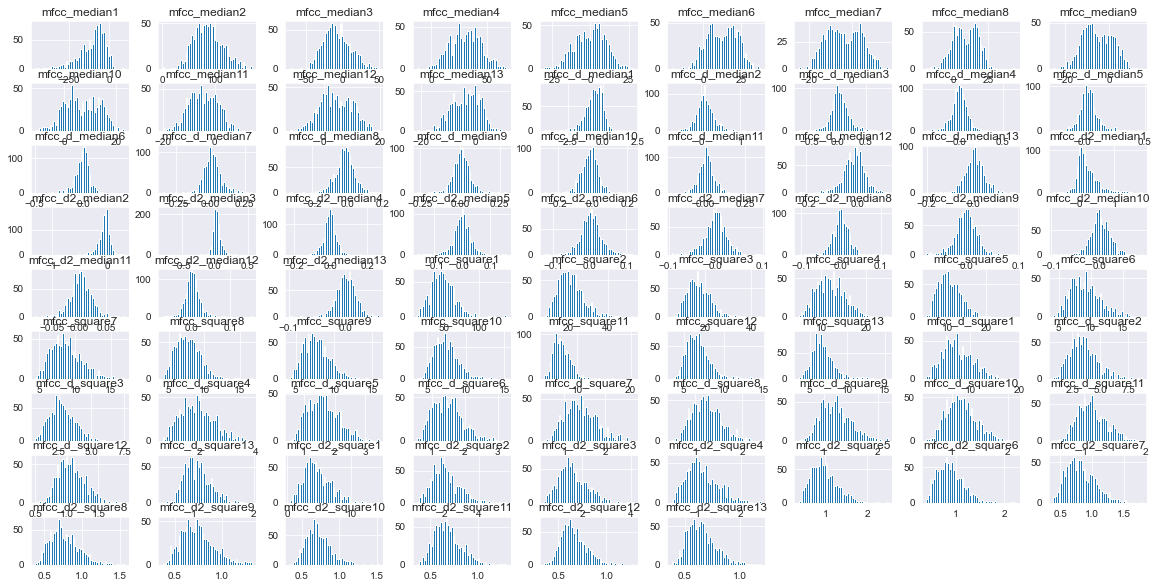

In [8]:
gtzan_df.hist(bins=50, figsize=(20,10))
save_plot("mfcc_gtzan_features_histogram")
plt.show()

In [38]:
pca_mfcc = PCA(n_components=10, random_state=42)
songs_mfcc_pca = pca_mfcc.fit_transform(gtzan_df)
pca_mfcc.explained_variance_ratio_.sum()

0.9904539087640717

In [39]:
df_pca_mfcc = pd.DataFrame(songs_mfcc_pca, columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', "C10"])
df_pca_mfcc.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,-16.398813,-24.975888,-7.884312,-1.348378,-8.216550,-1.288969,-2.169895,2.988776,-1.902735,-3.529190
1,50.257065,7.143937,-5.177443,17.739342,-24.977813,-7.999262,-6.997066,4.149749,-3.365606,-4.080163
2,-37.963385,-36.537467,-29.831461,4.718399,-7.883610,-9.221383,-8.376052,1.773584,1.818082,4.311734
3,55.632500,-1.579697,-23.623964,0.708686,-24.315259,1.055296,-9.444542,10.192066,4.360965,-3.848399
4,19.498046,-27.550247,-22.188018,12.653088,16.023879,-23.642744,7.630638,1.225899,8.027791,6.359973


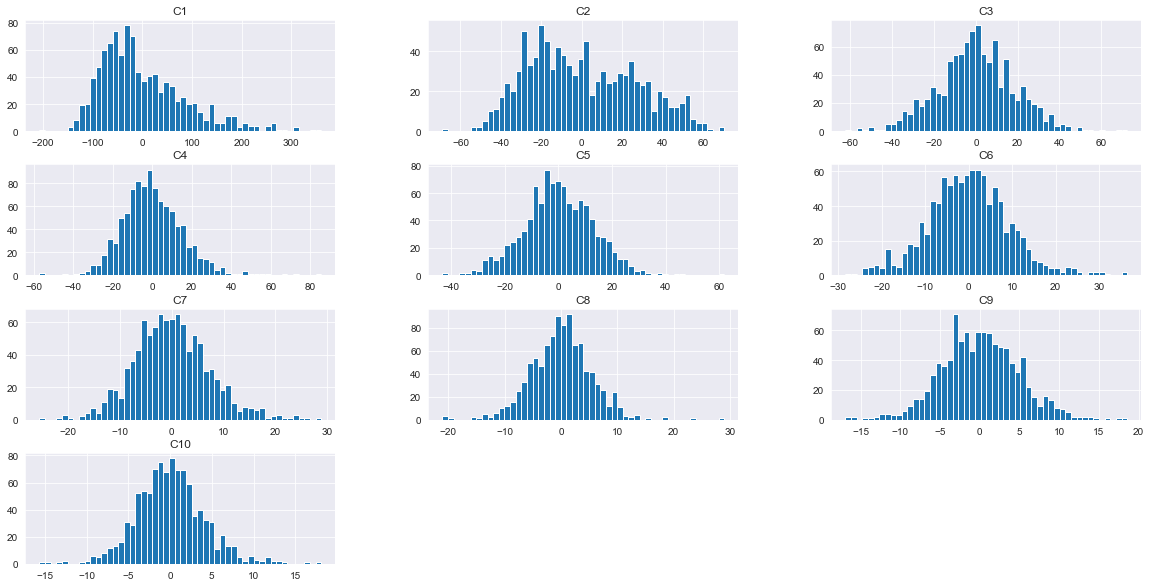

In [40]:
df_pca_mfcc.hist(bins=50, figsize=(20,10))
save_plot("mfcc_pca_gtzan_features_histogram")
plt.show()

In [43]:
mms = MinMaxScaler()

mfcc_pca_scaled = mms.fit_transform(df_pca_mfcc)
mfcc_pca_scaled_df = pd.DataFrame(mfcc_pca_scaled)
print("Scales: ", mfcc_pca_scaled[0,:])

Scales:  [0.33646425 0.31527168 0.40446189 0.39096177 0.33385682 0.41692328
 0.42890322 0.4801707  0.42314523 0.35907332]


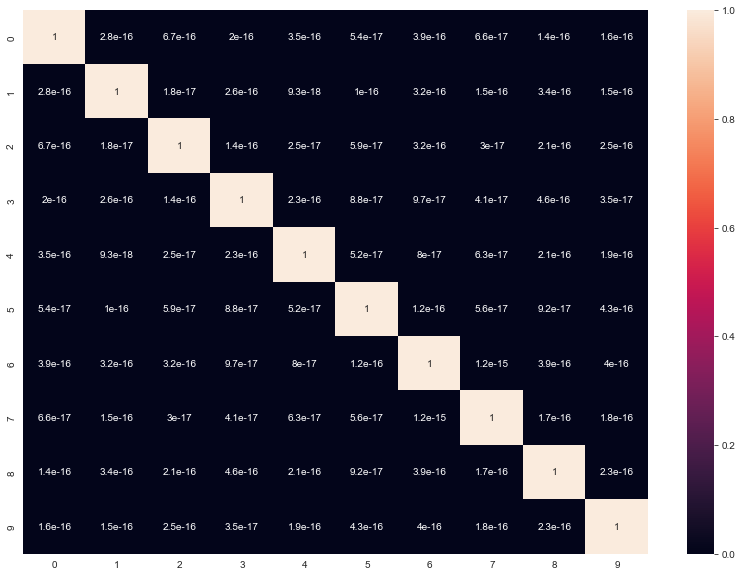

In [44]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(mfcc_pca_scaled_df.corr().abs(), annot=True, ax=ax)
save_plot("correlation_mfcc_pca_gtzan")
plt.show()

In [110]:
n_clusters = range(2, len(genres_df.unique()) + 3)
wcss = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(mfcc_pca_scaled)
    preds = km.predict(mfcc_pca_scaled)
    centers = km.cluster_centers_
    wcss.append(km.inertia_)
    score = silhouette_score(mfcc_pca_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.1533975637946292
Number of Clusters = 3, Silhouette Score = 0.16676824316727668
Number of Clusters = 4, Silhouette Score = 0.15488174183125264
Number of Clusters = 5, Silhouette Score = 0.1539524889995266
Number of Clusters = 6, Silhouette Score = 0.12545681063121977
Number of Clusters = 7, Silhouette Score = 0.10215901771645405
Number of Clusters = 8, Silhouette Score = 0.10347319973905672
Number of Clusters = 9, Silhouette Score = 0.10764637939666713
Number of Clusters = 10, Silhouette Score = 0.10838510391292705
Number of Clusters = 11, Silhouette Score = 0.10620709167057615
Number of Clusters = 12, Silhouette Score = 0.10258229486252
Number of Clusters = 2, Silhouette Score = 0.1533975637946292
Number of Clusters = 3, Silhouette Score = 0.16676824316727668
Number of Clusters = 4, Silhouette Score = 0.15488174183125264
Number of Clusters = 5, Silhouette Score = 0.1539524889995266
Number of Clusters = 6, Silhouette Score = 0.12545681063121

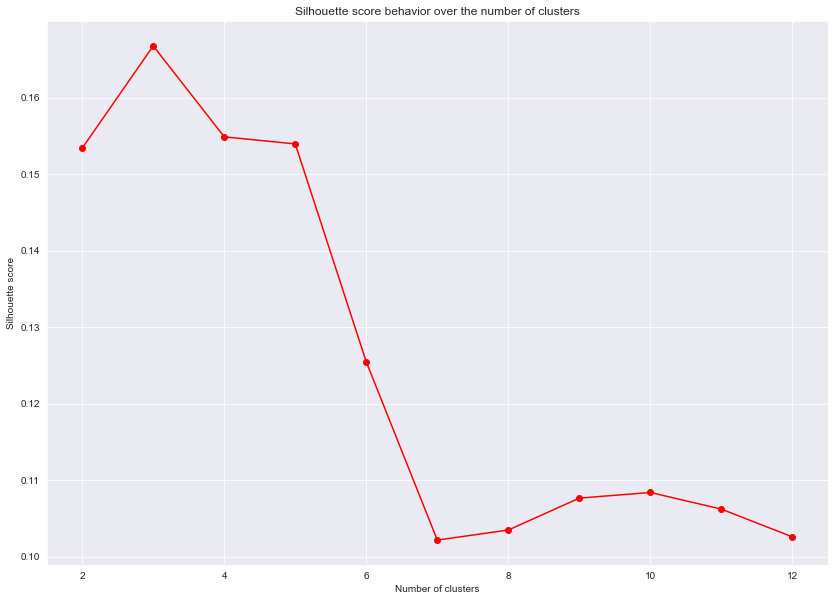

In [111]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
save_plot("mfcc_pca_silhouette_score")
plt.show()

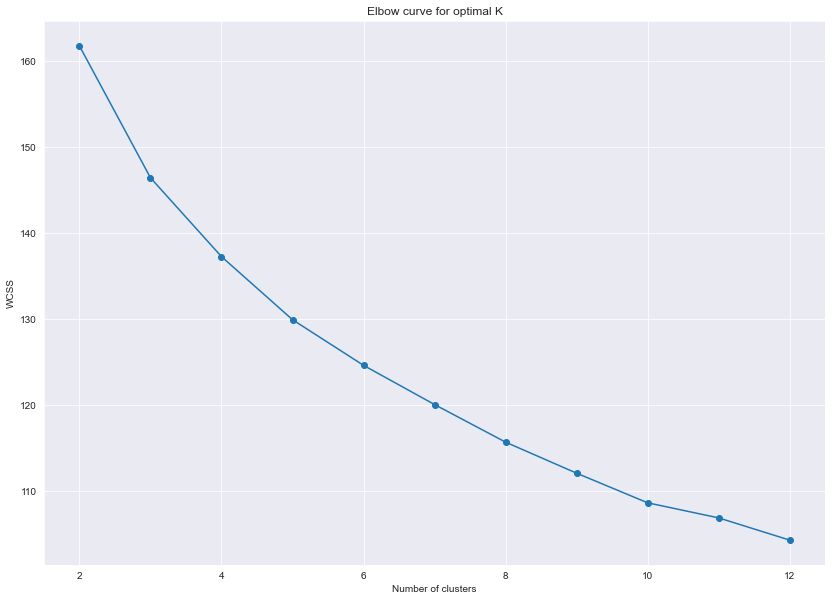

In [112]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(n_clusters, wcss, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow curve for optimal K')
save_plot("mfcc_pca_elbow")
plt.show()

In [51]:
k=7

model = KMeans(n_clusters=k, random_state=42).fit(mfcc_pca_scaled)
# pred = model.predict(spotify_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [6 2 4 2 4 4 0 0 4 4]


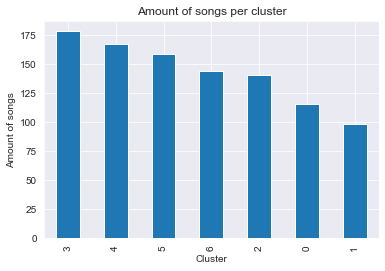

In [71]:
mfcc_pca_scaled_df["cluster"] = model.labels_

mfcc_pca_scaled_df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
save_plot("mfcc_pca_clisters_amount")
plt.show()

In [75]:
genres_clusters = pd.DataFrame(
    {
        "cluster": mfcc_pca_scaled_df['cluster'],
        "label": genres_df
    }
)
genres_clusters

,cluster,label
0,6,blues
1,2,blues
2,4,blues
3,2,blues
4,4,blues
...,...,...
995,6,rock
996,6,rock
997,6,rock
998,6,rock


In [53]:
display(mfcc_pca_scaled_df['cluster'].value_counts())
minor_cluster = mfcc_pca_scaled_df['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

3    178
4    167
5    158
6    144
2    140
0    115
1     98
Name: cluster, dtype: int64

Amount of songs in the smallest cluster:  98


In [99]:
df_radar = mfcc_pca_scaled_df.groupby('cluster').mean().reset_index()
df_radar

,cluster,0,1,2,3,4,5,6,7,8,9
0,0,0.432227,0.375036,0.318838,0.409879,0.403984,0.569234,0.571469,0.391180,0.532312,0.510087
1,1,0.667620,0.472796,0.463091,0.366436,0.553063,0.384286,0.472375,0.472127,0.458688,0.446146
2,2,0.467056,0.515013,0.505827,0.452017,0.270412,0.407233,0.383125,0.393293,0.456088,0.480571
3,3,0.292988,0.770988,0.442320,0.397930,0.412978,0.393277,0.525137,0.431083,0.480862,0.465851
4,4,0.281194,0.315017,0.502238,0.407667,0.390639,0.311984,0.471898,0.434223,0.548766,0.454376
5,5,0.270138,0.620089,0.422867,0.346987,0.478876,0.536507,0.400889,0.420507,0.484388,0.465599
6,6,0.298938,0.312601,0.560113,0.419038,0.409402,0.484781,0.469655,0.405972,0.367952,0.427663


In [55]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar plot
    #ax = plt.subplot(4,ceil(num_clusters/4),row+1, polar=True, )
    ax = plt.subplot(2, math.ceil(num_clusters/2),row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

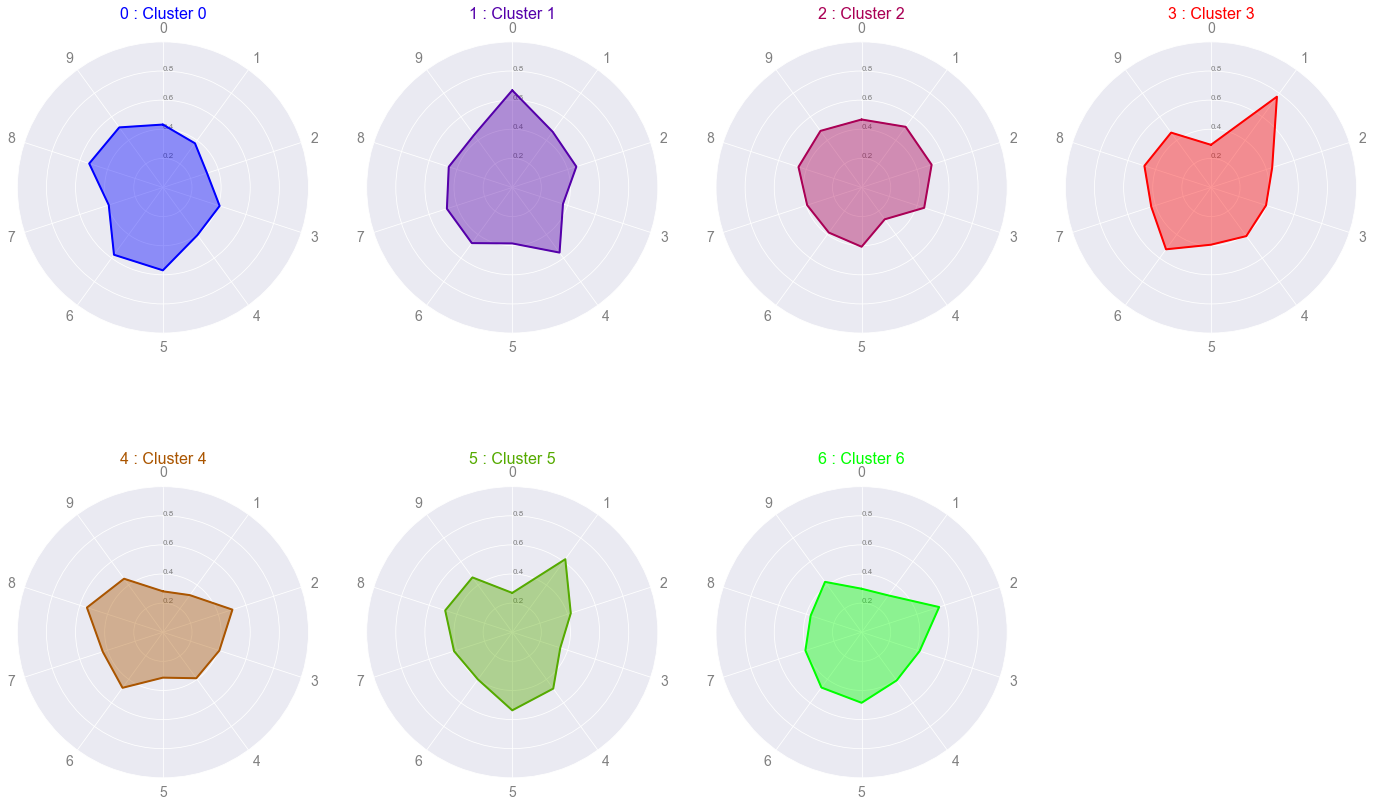

In [57]:
plt.figure(figsize=(24,15))

# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(df_radar.index))

# Create cluster name
title_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3',
              'Cluster 4', 'Cluster 5', "Cluster 6"]

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))
save_plot("radar_mfcc_pca")

In [106]:
genres_clusters_radar_df = pd.get_dummies(genres_clusters, prefix="", prefix_sep="")
genres_clusters_radar_df = genres_clusters_radar_df.groupby('cluster').sum()
genres_clusters_radar_df = genres_clusters_radar_df / 100
genres_clusters_radar_df = genres_clusters_radar_df.reset_index()
genres_clusters_radar_df

,cluster,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,0,0.15,0.11,0.30,0.02,0.01,0.30,0.04,0.01,0.15,0.06
1,1,0.00,0.82,0.01,0.01,0.00,0.11,0.00,0.01,0.02,0.00
2,2,0.36,0.00,0.17,0.13,0.12,0.15,0.00,0.00,0.36,0.11
3,3,0.00,0.02,0.06,0.16,0.37,0.14,0.00,0.71,0.21,0.11
4,4,0.26,0.01,0.14,0.31,0.21,0.04,0.35,0.00,0.03,0.32
5,5,0.00,0.01,0.22,0.29,0.18,0.14,0.04,0.27,0.22,0.21
6,6,0.23,0.03,0.10,0.08,0.11,0.12,0.57,0.00,0.01,0.19


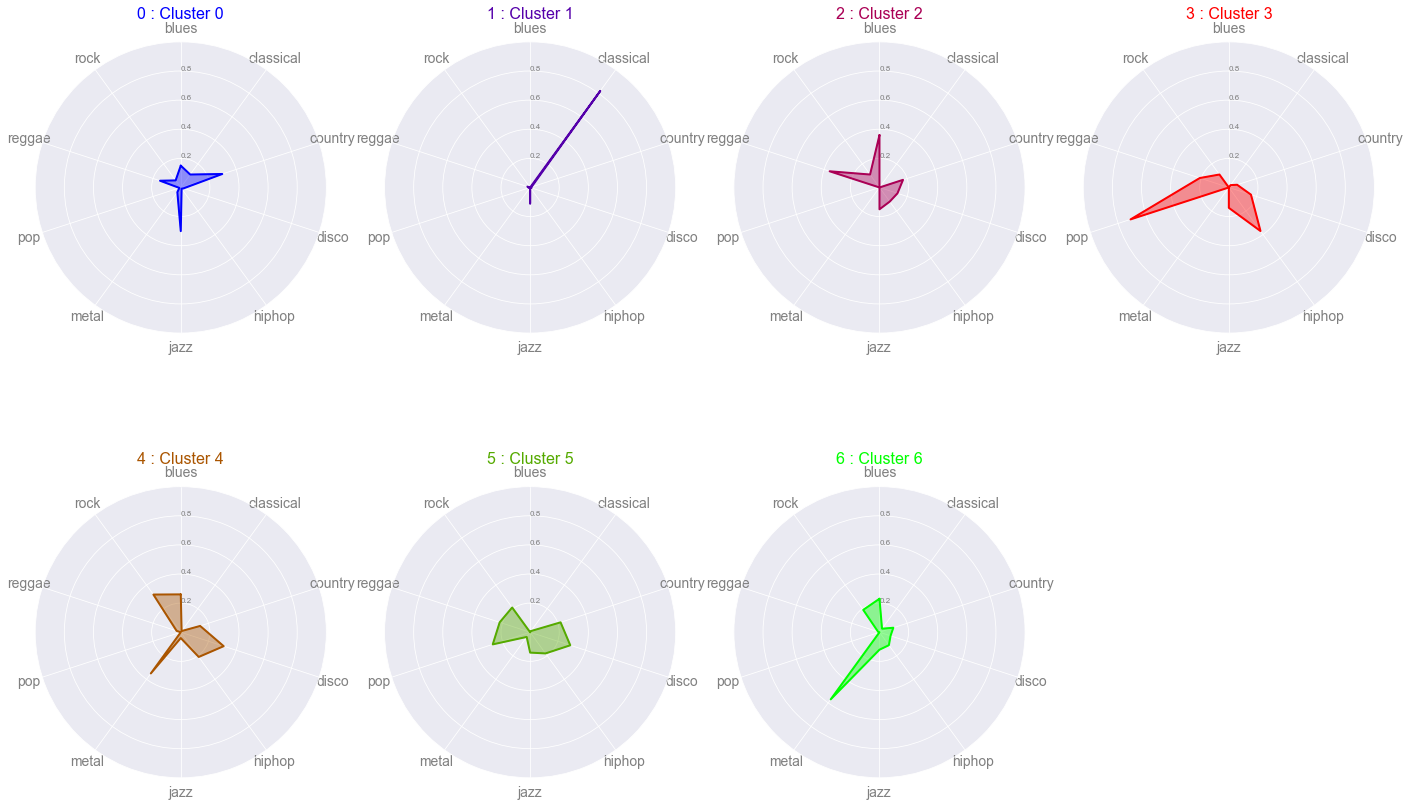

In [107]:
plt.figure(figsize=(24,15))

# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(genres_clusters_radar_df.index))

# Create cluster name
title_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3',
              'Cluster 4', 'Cluster 5', "Cluster 6"]

# Loop to plot
for row in range(0, len(genres_clusters_radar_df.index)):
    make_radar(row=row, title=str(genres_clusters_radar_df['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=genres_clusters_radar_df, num_clusters=len(genres_clusters_radar_df.index))
save_plot("radar_genres_mfcc_pca")

In [58]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(mfcc_pca_scaled)
pca.explained_variance_ratio_.sum()

0.4212036784236669

In [60]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,cluster
0,-0.179125,-0.028897,-0.019892,6
1,0.051236,0.088559,-0.123451,2
2,-0.262044,-0.066896,-0.142311,4
3,-0.011329,0.098031,0.016286,2
4,-0.197589,0.034358,-0.364873,4


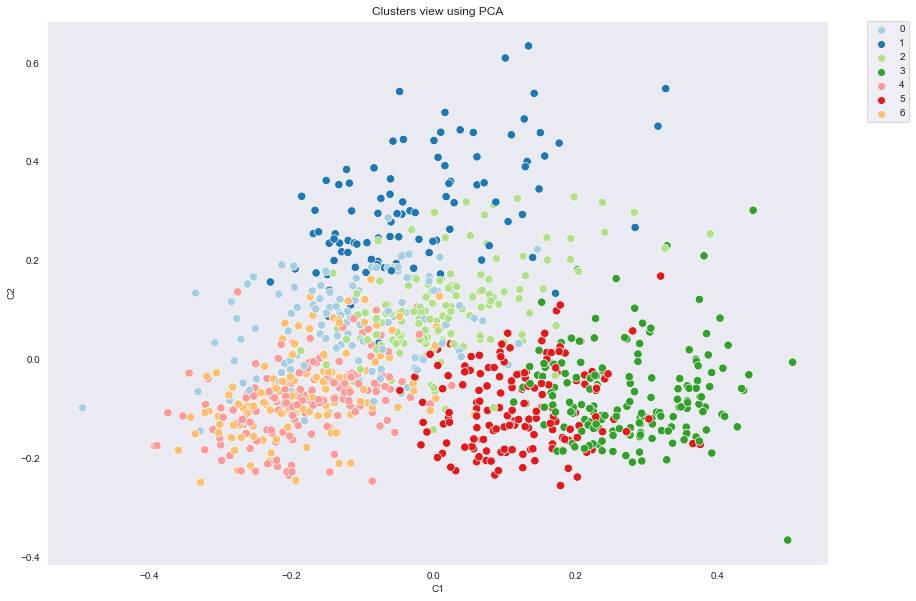

In [63]:
fig, ax = plt.subplots(figsize=(14,10))

sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_pca , legend="full", palette='Paired', ax=ax, s=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.grid(alpha=0.8)
save_plot("gtzan_mfcc_pca_cluster2d_base")
plt.show()

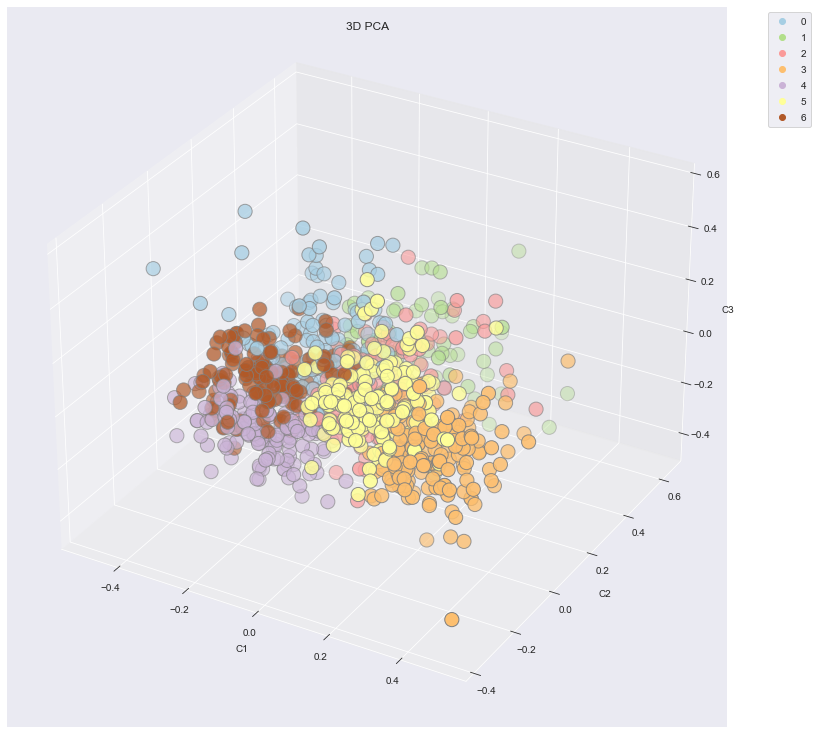

In [65]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('3D PCA')
ax = Axes3D(fig)

sc = ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired', s=200, edgecolors="gray")

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
save_plot("gtzan_mfcc_pca_3d_base")
plt.show()

In [66]:
tsne = TSNE(n_components=3, perplexity=50, random_state=42)
songs_tsne = tsne.fit_transform(mfcc_pca_scaled)

In [67]:
df_tsne = pd.DataFrame(songs_tsne, columns=['C1', 'C2', "C3"])
df_tsne['cluster'] = model.labels_
df_tsne.head()

,C1,C2,C3,cluster
0,-6.211740,22.931086,1.976729,6
1,4.569222,19.069132,14.340025,2
2,-38.131367,7.540457,18.241840,4
3,3.664836,3.877878,19.436539,2
4,-21.103384,42.869701,33.252724,4


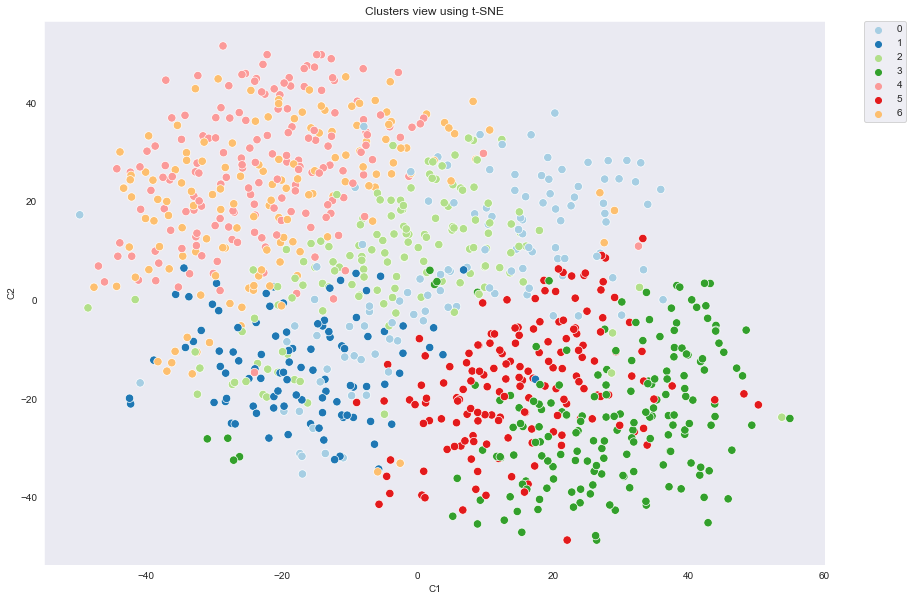

In [69]:
fig, ax = plt.subplots(figsize=(14,10))

sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_tsne , legend="full", palette='Paired', ax=ax, s=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using t-SNE')
plt.grid(alpha=0.8)
save_plot("gtzan_mfcc_tsne_cluster2d_base")
plt.show()

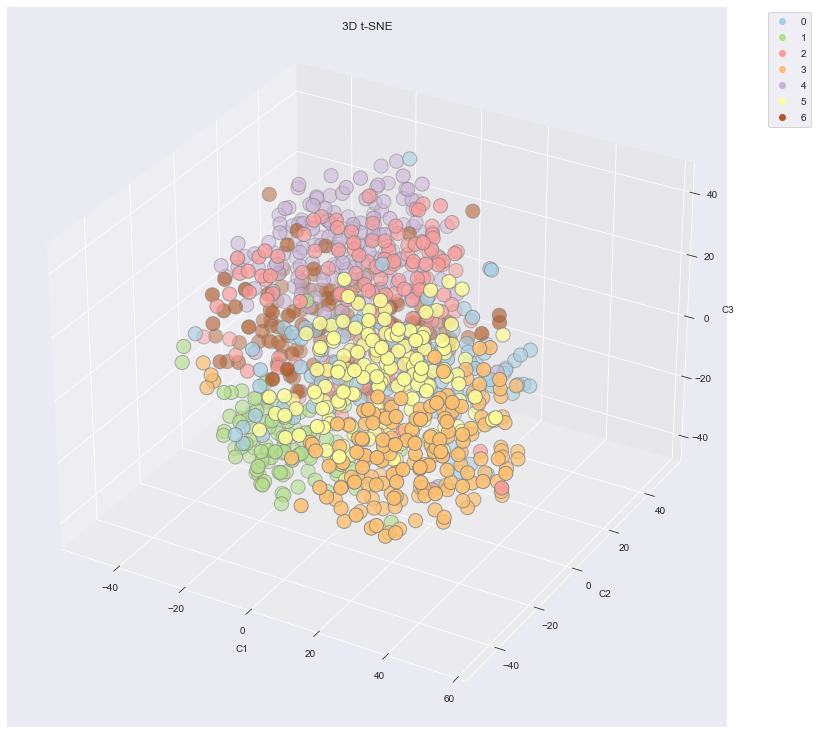

In [70]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('3D t-SNE')
ax = Axes3D(fig)

sc = ax.scatter(df_tsne['C1'], df_tsne['C2'], df_tsne['C3'],
           c=df_tsne['cluster'], cmap='Paired', s=200, edgecolors="gray")

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
save_plot("gtzan_mfcc_tsne_3d_base")
plt.show()